# **Data Time Series using LSTM**


## **Download Dataset from Kaggle**

In [1]:
# Menginstal paket Kaggle
!pip install -q kaggle

In [2]:
# Mengunggah file kaggle.json menggunakan Google Colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"angelmetanosaa","key":"081c6b6c1eeb787516fcb0df2619ae57"}'}

In [3]:
# Membuat direktori dan mengganti izin
!mkdir -p ~/.kaggle

# Menyalin file kaggle.json ke direktori .kaggle
!cp kaggle.json ~/.kaggle/

# Mengubah izin file kaggle.json menjadi 600 (hanya pemilik yang dapat membaca dan menulis)
!chmod 600 ~/.kaggle/kaggle.json

# Menampilkan daftar file di dalam direktori .kaggle untuk memastikan kaggle.json ada di dalamnya
!ls ~/.kaggle

kaggle.json


In [4]:
# Mengunduh dataset, pilih 'copy api command' dari dataset Kaggle
!kaggle datasets download -d mnassrib/jena-climate

 91% 12.0M/13.2M [00:01<00:00, 10.4MB/s]
100% 13.2M/13.2M [00:01<00:00, 7.54MB/s]


In [5]:
# Membuat direktori baru bernama 'jena-climate'
!mkdir jena-climate

# Mengekstrak isi dari file 'bbcnewsarchive.zip' ke dalam direktori 'jena-climate'
!unzip jena-climate.zip -d jena-climate

# Menampilkan daftar file di dalam direktori 'jena-climate' setelah diekstrak
!ls jena-climate

Archive:  jena-climate.zip
  inflating: jena-climate/jena_climate_2009_2016.csv  
jena_climate_2009_2016.csv


## **Dataset Loading**

In [6]:
# Mengimpor library pandas dan memberikan alias 'pd'
import pandas as pd

In [7]:
# Memuat dataset
df = pd.read_csv('/content/jena-climate/jena_climate_2009_2016.csv', sep=',')

# Menampilkan 10 baris pertama dari dataset
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [8]:
# Informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


##**Data Preprocessing**

In [9]:
import pandas as pd

# Membuat salinan independen dari slice DataFrame df
df_new = df[['Date Time', 'Tdew (degC)']].copy()

# Mengonversi kolom 'Date Time' menjadi tipe datetime pada df_new
df_new['Date Time'] = pd.to_datetime(df_new['Date Time'])

# Set 'Date Time' sebagai indeks DataFrame
df_new.set_index('Date Time', inplace=True)

# Menghitung rata-rata per 6 jam
df_6hourly_avg = df_new.resample('6H').mean()

# Menampilkan df_6hourly_avg
df_6hourly_avg.head()

,Tdew (degC)
Date Time,
2009-01-01 00:00:00,-9.756571
2009-01-01 06:00:00,-9.019167
2009-01-01 12:00:00,-7.186111
2009-01-01 18:00:00,-6.148889
2009-01-02 00:00:00,-5.885278


In [10]:
# Menghitung rata-rata keseluruhan data pada kolom 'Tdew (degC)'
rh_mean = df_6hourly_avg['Tdew (degC)'].mean()

# Mengisi nilai null dengan rata-rata keseluruhan data pada kolom 'Tdew (degC)'
df_6hourly_avg['Tdew (degC)'].fillna(rh_mean, inplace=True)

# Menampilkan DataFrame yang sudah diisi nilai null
df_6hourly_avg.head()

,Tdew (degC)
Date Time,
2009-01-01 00:00:00,-9.756571
2009-01-01 06:00:00,-9.019167
2009-01-01 12:00:00,-7.186111
2009-01-01 18:00:00,-6.148889
2009-01-02 00:00:00,-5.885278


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Membuat salinan independen dari DataFrame
df_normalized = df_6hourly_avg.copy()

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom 'Tdew (degC)'
df_normalized[['Tdew (degC)']] = scaler.fit_transform(df_6hourly_avg[['Tdew (degC)']])

# Menampilkan DataFrame yang sudah dinormalisasi
df_normalized.head()

,Tdew (degC)
Date Time,
2009-01-01 00:00:00,0.309646
2009-01-01 06:00:00,0.325937
2009-01-01 12:00:00,0.366432
2009-01-01 18:00:00,0.389346
2009-01-02 00:00:00,0.395169


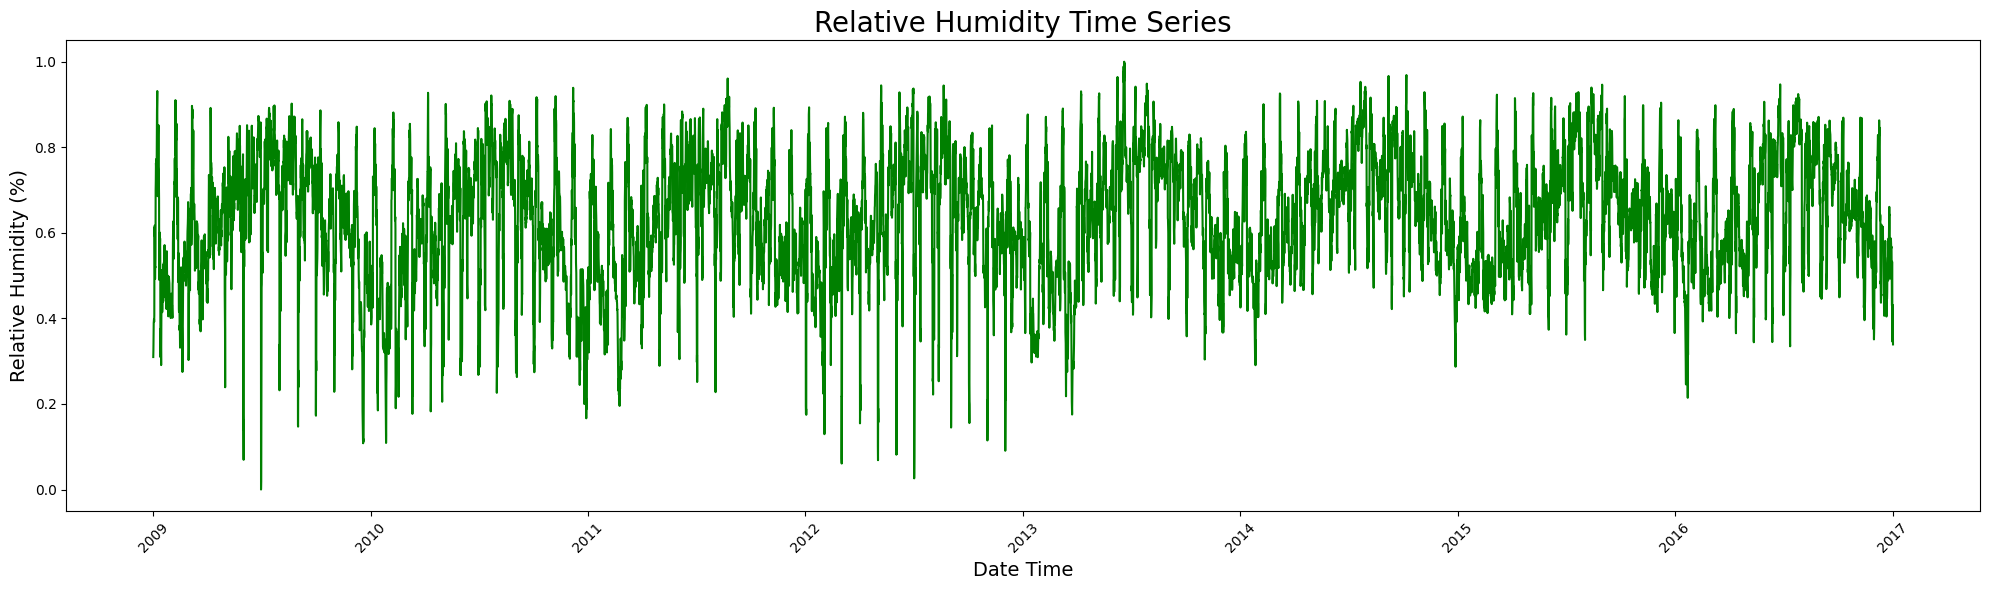

In [13]:
import matplotlib.pyplot as plt

# Membuat plot time series
plt.figure(figsize=(20, 6))
plt.plot(df_normalized.index, df_normalized['Tdew (degC)'], label='Relative Humidity (%)', color='green')
plt.xlabel('Date Time', fontsize=14)
plt.ylabel('Relative Humidity (%)', fontsize=14)
plt.title('Relative Humidity Time Series', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Fungsi untuk membuat dataset berdasarkan jendela waktu
def create_time_series_dataset(data, window_size):
    features, targets = [], []

    for i in range(len(data) - window_size):
        features.append(data[i:i + window_size])
        targets.append(data[i + window_size])

    return tf.convert_to_tensor(features), tf.convert_to_tensor(targets)

# Membagi data menjadi data pelatihan (80%) dan data validasi (20%)
train_data, valid_data = train_test_split(df_normalized['Tdew (degC)'].values, test_size=0.2, shuffle=False)

# Menentukan ukuran jendela waktu
window_size = 144

# Membuat dataset pelatihan dan validasi menggunakan fungsi create_time_series_dataset
train_features, train_targets = create_time_series_dataset(train_data, window_size)
valid_features, valid_targets = create_time_series_dataset(valid_data, window_size)

# Membuat objek dataset dengan menggunakan metode from_tensor_slices
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_targets))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_features, valid_targets))

# Mengacak dan batch dataset pelatihan
train_dataset = train_dataset.shuffle(buffer_size=len(train_features)).batch(128).prefetch(1)

# Mengatur batch size dan prefetch untuk dataset validasi
valid_dataset = valid_dataset.batch(128).prefetch(1)

## **Modelling and Evaluation**

In [15]:
import tensorflow as tf

# Buat model dengan beberapa penyesuaian
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1),
])

optimizer_improved = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss=tf.keras.losses.Huber(),
                      optimizer=optimizer_improved,
                      metrics=["mae"])

# Bangun model
model.build(input_shape=(None, None, 1))

# Tampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 256)         264192    
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 128)         197120    
                                                                 
 dropout_1 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          49408     
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_3 (LSTM)               (None, None, 32)          1

In [16]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0
)

In [17]:
# Definisikan ulang kelas my_callbacks untuk mengubah batas MAE threshold
class MyCallbacks(tf.keras.callbacks.Callback):
    mae_threshold = 0.1  # Ganti dengan nilai threshold yang diinginkan
    path = "best_model.h5"

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('mae') <= self.mae_threshold:
            print('\nFor Epoch', epoch, '\nMAE has reached threshold = %2.4f' % logs['mae'], 'training has been stopped.')
            self.model.stop_training = True

# Buat instance dari kelas callback
callback_instance = MyCallbacks()

In [18]:
# Latih model dengan callback
history_complex = model.fit(train_dataset, epochs=200, validation_data=valid_dataset, callbacks=[callback_instance, reduce_lr])

Epoch 1/200
72/72 [==============================] - 16s 70ms/step - loss: 0.0839 - mae: 0.3442 - val_loss: 0.0254 - val_mae: 0.1905 - lr: 0.0010
Epoch 2/200
72/72 [==============================] - 3s 47ms/step - loss: 0.0374 - mae: 0.2222 - val_loss: 0.0177 - val_mae: 0.1541 - lr: 0.0010
Epoch 3/200
72/72 [==============================] - 4s 51ms/step - loss: 0.0257 - mae: 0.1831 - val_loss: 0.0120 - val_mae: 0.1273 - lr: 0.0010
Epoch 4/200
72/72 [==============================] - 3s 47ms/step - loss: 0.0215 - mae: 0.1662 - val_loss: 0.0112 - val_mae: 0.1232 - lr: 0.0010
Epoch 5/200
72/72 [==============================] - 5s 64ms/step - loss: 0.0177 - mae: 0.1503 - val_loss: 0.0084 - val_mae: 0.1073 - lr: 0.0010
Epoch 6/200
72/72 [==============================] - 3s 47ms/step - loss: 0.0154 - mae: 0.1411 - val_loss: 0.0088 - val_mae: 0.1095 - lr: 0.0010
Epoch 7/200
72/72 [==============================] - 3s 47ms/step - loss: 0.0131 - mae: 0.1290 - val_loss: 0.0076 - val_mae: 0.10

In [19]:
# Ambil nilai skala data dari dataset Anda
skala_data = df_normalized['Tdew (degC)'].max() - df_normalized['Tdew (degC)'].min()

# Hitung batas MAE setara dengan 10% dari skala data
batas_mae = 0.1 * skala_data

print("Batas MAE yang setara dengan 10% dari skala data:", batas_mae)

Batas MAE yang setara dengan 10% dari skala data: 0.1


In [20]:
# Evaluasi model pada dataset validasi
eval_result = model.evaluate(valid_dataset)

# Tampilkan hasil evaluasi
print(f"Loss: {eval_result[0]}, MAE: {eval_result[1]}")

18/18 [==============================] - 0s 18ms/step - loss: 0.0052 - mae: 0.0813
Loss: 0.005214872304350138, MAE: 0.08132394403219223
